In [52]:
# -*- coding:cp949 -*-

import os
import numpy as np
import struct
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt

In [53]:
def getrgb888(r, g, b):
    i = 1
    if r >= g and r >= b:
        i = r / 255 + 1
    elif g >= r and g >= b:
        i = g / 255 + 1
    elif b >= g and b >= r:
        i = b / 255 + 1

    if i != 0:
        r_ = r / i
        g_ = g / i
        b_ = b / i
    else:
        r_ = r
        g_ = g
        b_ = b

    if r_ > 30:
        r_ = r_ - 30
    if g_ > 30:
        g_ = g_ - 30
    if b > 30:
        b_ = b_ - 30

    r_ = r_ * 255 / 225
    g_ = g_ * 255 / 225
    b_ = b_ * 255 / 225

    if r_ > 255:
        r_ = 255
    if g_ > 255:
        g_ = 255
    if b_ > 255:
        b_ = 255

    rgblist = [np.uint8(r_), np.uint8(g_), np.uint8(b_)]
    return rgblist
#raw값을 rgb값으로 변환

In [54]:
direction = input("input the foldername : ")
curr_path = os.path.join(os.path.abspath(os.getcwd()), direction)
txt_path = os.path.join(os.path.abspath(os.getcwd()), 'tmp_filelist.txt')

dataX, dataY = [], []

with open(txt_path, 'wt') as f:
    for root, dirs, files in os.walk(curr_path):
        if files:
            for file in files:
                if file.find('.bin') > 0:
                    filename = os.path.join(root, file)
                    f.write(filename + '\n')

with open(txt_path, 'r') as file:
    lines = file.readlines()
    lines.sort()
    j = 0;
    for line in lines:
        bfname = ''.join([os.path.splitext(line)[0], '.bin'])
        with open(bfname, 'rb') as BF:
            while True:
                temp = BF.read(1)  # 0x02 (Start of File)
                if not temp: break
                m_AcX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                tmp = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_C = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_R = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_G = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_B = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                PPM = np.int(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 8) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 16) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 24))

                rgb = getrgb888(c_R, c_G, c_B)
                dataX.append(0x000000 | rgb[0] << 16 | rgb[1] << 8 | rgb[2])
                dataY.append(os.path.splitext(os.path.basename(line))[0])
                temp = BF.read(1)  # 0x03 (End of File)
        j += 1

dataX = np.array(dataX)

t = Tokenizer()
t.fit_on_texts(dataY)
dataY_=t.texts_to_sequences(dataY)
dataY = to_categorical(dataY_)
#카테고리에 대한 one-hot encoding

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, shuffle=True, stratify=dataY, random_state=34)


input the foldername : bin


In [55]:
model = models.Sequential()
model.add(layers.Dense(64, input_dim=1, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(j + 1, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

hist = model.fit(x_train,
                y_train,
                epochs=500,
                batch_size=32
                )



Epoch 1/500
322/322 [==============================] - 0s 784us/step - loss: 759532.4899 - accuracy: 0.0839
Epoch 2/500
322/322 [==============================] - 0s 90us/step - loss: 214612.2937 - accuracy: 0.1335
Epoch 3/500
322/322 [==============================] - 0s 102us/step - loss: 162381.6920 - accuracy: 0.1770
Epoch 4/500
322/322 [==============================] - 0s 81us/step - loss: 99976.0663 - accuracy: 0.1087
Epoch 5/500
322/322 [==============================] - 0s 56us/step - loss: 85259.0237 - accuracy: 0.1460
Epoch 6/500
322/322 [==============================] - 0s 65us/step - loss: 46151.8996 - accuracy: 0.1832
Epoch 7/500
322/322 [==============================] - 0s 90us/step - loss: 51095.0696 - accuracy: 0.1522
Epoch 8/500
322/322 [==============================] - 0s 56us/step - loss: 9770.3943 - accuracy: 0.1491
Epoch 9/500
322/322 [==============================] - 0s 56us/step - loss: 2.1902 - accuracy: 0.1273
Epoch 10/500
322/322 [========================

322/322 [==============================] - 0s 74us/step - loss: 2.0825 - accuracy: 0.2516
Epoch 81/500
322/322 [==============================] - 0s 59us/step - loss: 2.0817 - accuracy: 0.2516
Epoch 82/500
322/322 [==============================] - 0s 56us/step - loss: 2.0809 - accuracy: 0.2516
Epoch 83/500
322/322 [==============================] - 0s 81us/step - loss: 2.0801 - accuracy: 0.2516
Epoch 84/500
322/322 [==============================] - 0s 62us/step - loss: 2.0794 - accuracy: 0.2516
Epoch 85/500
322/322 [==============================] - 0s 56us/step - loss: 2.0785 - accuracy: 0.2516
Epoch 86/500
322/322 [==============================] - 0s 84us/step - loss: 2.0776 - accuracy: 0.2516
Epoch 87/500
322/322 [==============================] - 0s 74us/step - loss: 2.0767 - accuracy: 0.2516
Epoch 88/500
322/322 [==============================] - 0s 62us/step - loss: 2.0758 - accuracy: 0.2516
Epoch 89/500
322/322 [==============================] - 0s 56us/step - loss: 2.0750 - 

322/322 [==============================] - 0s 71us/step - loss: 2.0397 - accuracy: 0.2516
Epoch 160/500
322/322 [==============================] - 0s 68us/step - loss: 2.0395 - accuracy: 0.2516
Epoch 161/500
322/322 [==============================] - 0s 59us/step - loss: 2.0391 - accuracy: 0.2516
Epoch 162/500
322/322 [==============================] - 0s 77us/step - loss: 2.0388 - accuracy: 0.2516
Epoch 163/500
322/322 [==============================] - 0s 84us/step - loss: 2.0385 - accuracy: 0.2516
Epoch 164/500
322/322 [==============================] - 0s 62us/step - loss: 2.0383 - accuracy: 0.2516
Epoch 165/500
322/322 [==============================] - 0s 59us/step - loss: 2.0381 - accuracy: 0.2516
Epoch 166/500
322/322 [==============================] - 0s 71us/step - loss: 2.0379 - accuracy: 0.2516
Epoch 167/500
322/322 [==============================] - 0s 87us/step - loss: 2.0377 - accuracy: 0.2516
Epoch 168/500
322/322 [==============================] - 0s 59us/step - loss: 

322/322 [==============================] - 0s 102us/step - loss: 2.0259 - accuracy: 0.2516
Epoch 238/500
322/322 [==============================] - 0s 77us/step - loss: 2.0259 - accuracy: 0.2516
Epoch 239/500
322/322 [==============================] - 0s 102us/step - loss: 2.0258 - accuracy: 0.2516
Epoch 240/500
322/322 [==============================] - 0s 133us/step - loss: 2.0256 - accuracy: 0.2516
Epoch 241/500
322/322 [==============================] - 0s 99us/step - loss: 2.0256 - accuracy: 0.2516
Epoch 242/500
322/322 [==============================] - 0s 99us/step - loss: 2.0254 - accuracy: 0.2516
Epoch 243/500
322/322 [==============================] - 0s 121us/step - loss: 2.0253 - accuracy: 0.2516
Epoch 244/500
322/322 [==============================] - 0s 127us/step - loss: 2.0252 - accuracy: 0.2516
Epoch 245/500
322/322 [==============================] - 0s 105us/step - loss: 2.0251 - accuracy: 0.2516
Epoch 246/500
322/322 [==============================] - 0s 87us/step - 

322/322 [==============================] - 0s 59us/step - loss: 2.0197 - accuracy: 0.2516
Epoch 316/500
322/322 [==============================] - 0s 59us/step - loss: 2.0196 - accuracy: 0.2516
Epoch 317/500
322/322 [==============================] - 0s 71us/step - loss: 2.0195 - accuracy: 0.2516
Epoch 318/500
322/322 [==============================] - 0s 74us/step - loss: 2.0194 - accuracy: 0.2516
Epoch 319/500
322/322 [==============================] - 0s 59us/step - loss: 2.0194 - accuracy: 0.2516
Epoch 320/500
322/322 [==============================] - 0s 56us/step - loss: 2.0193 - accuracy: 0.2516
Epoch 321/500
322/322 [==============================] - 0s 71us/step - loss: 2.0193 - accuracy: 0.2516
Epoch 322/500
322/322 [==============================] - 0s 56us/step - loss: 2.0193 - accuracy: 0.2516
Epoch 323/500
322/322 [==============================] - 0s 84us/step - loss: 2.0192 - accuracy: 0.2516
Epoch 324/500
322/322 [==============================] - 0s 65us/step - loss: 

322/322 [==============================] - 0s 74us/step - loss: 2.0160 - accuracy: 0.2516
Epoch 394/500
322/322 [==============================] - 0s 99us/step - loss: 2.0159 - accuracy: 0.2516
Epoch 395/500
322/322 [==============================] - 0s 68us/step - loss: 2.0158 - accuracy: 0.2516
Epoch 396/500
322/322 [==============================] - 0s 65us/step - loss: 2.0157 - accuracy: 0.2516
Epoch 397/500
322/322 [==============================] - 0s 77us/step - loss: 2.0157 - accuracy: 0.2516
Epoch 398/500
322/322 [==============================] - 0s 96us/step - loss: 2.0156 - accuracy: 0.2516
Epoch 399/500
322/322 [==============================] - 0s 74us/step - loss: 2.0156 - accuracy: 0.2516
Epoch 400/500
322/322 [==============================] - 0s 84us/step - loss: 2.0156 - accuracy: 0.2516
Epoch 401/500
322/322 [==============================] - 0s 84us/step - loss: 2.0155 - accuracy: 0.2516
Epoch 402/500
322/322 [==============================] - 0s 102us/step - loss:

322/322 [==============================] - 0s 96us/step - loss: 2.0136 - accuracy: 0.2516
Epoch 472/500
322/322 [==============================] - 0s 71us/step - loss: 2.0136 - accuracy: 0.2516
Epoch 473/500
322/322 [==============================] - 0s 56us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 474/500
322/322 [==============================] - 0s 71us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 475/500
322/322 [==============================] - 0s 77us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 476/500
322/322 [==============================] - 0s 68us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 477/500
322/322 [==============================] - 0s 81us/step - loss: 2.0136 - accuracy: 0.2516
Epoch 478/500
322/322 [==============================] - 0s 81us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 479/500
322/322 [==============================] - 0s 68us/step - loss: 2.0135 - accuracy: 0.2516
Epoch 480/500
322/322 [==============================] - 0s 87us/step - loss: 

In [56]:
model.evaluate(x_test, y_test, batch_size=32)
result = model.predict(x_test, batch_size=32)
print(result.shape)


81/81 [==============================] - 0s 468us/step
(81, 9)
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.00458599 0.24495658 0.13179572 0.12820233 0.11563028 0.1188416
 0.09606832 0.08570088 0.07421817]


KeyError: 'acc'

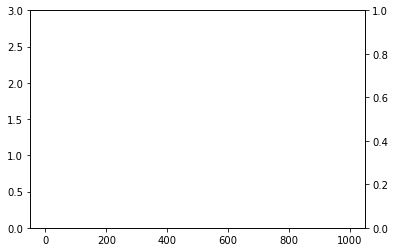

In [35]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])
print(hist)

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()